# <center><img src="images/gmit_image.jpg" width="275" height="275"/></center>
<h2 align="center"><em><strong>&nbsp&nbsp&nbsp&nbsp Modelling Real World Data </h2></em></strong><br/>
<h2 align="center"><em><strong>&nbsp&nbsp&nbsp&nbsp&nbspHigher Diploma in Data Analytics  </h2></em></strong><br/>





<br>
<br>

# Objectives
***

1. Choose a real-world phenomenon that can be measured.
2. Investigate the types of variables involved, their likely distributions, and their
relationships with each other, accross at least 4 variables.
3. Synthesise/simulate a data set as closely matching their properties as possible.


<br>

## Real World Phenomenon
## Hypertension
***


This project will explore *hypertension*, which is more commonly known as high blood pressure. This real world problem can result in stroke, heart<br>
disease and heart attacks. Blood pressure is measured using systolic blood pressure which measures the pressure in ones arteries when their heart<br>
beats, and diastolic blood pressure which measures the pressure in ones artetries between heart beats [1]. The Centers for Disease Control and<br>
Prevention breaks down blood pressure into the the categories in listed table 1 below [(link to data)](https://www.cdc.gov/bloodpressure/facts.htm), which will be utilised when modelling <br>blood pressure in this notebook.


<br>

<table style = 'float : left;'>
    <caption>Table 1: Blood Pressure (BP) Category in mmHg</caption>
     <thead>      
    </thead>    
    <thead>            
      <tr>
        <th>Category</th>
        <th>Systolic BP</th>
          <th></th>
        <th>Diastolic BP</th>  
      </tr>
    </thead>
    <tbody>
      <tr>
        <td>Normal</td>
        <td> &lt; 120</td>
        <td>and</td>
        <td>&lt; 80</td>
      </tr>
   
      <tr>
        <td>Elevated</td>
        <td>120 - 129</td>
        <td>and</td>
        <td>&lt; 80</td>
      </tr>
      <tr>
        <td>Hypertension Stage 1</td>  
        <td>130 - 139</td>
        <td>or</td>
        <td>80 - 89</td>
      </tr>
       <tr>
        <td>Hypertension Stage 2</td>  
        <td>≥ 140</td>
        <td>or</td>
        <td>≥ 90</td>
      </tr>
 </table>

<br>

## Variable Selection
***
It is important to investigate relevant features when modeling ones data. For example in Machine Learning feature selection methods are used to<br>
reduce the number of input variables to useful ones that can make better predictions (Brownlee 2020). With this in mind some of the feature variables<br> 
that help predict hypertension will now be investigated before deciding what variables will be used  to model the real world phenomenon of hypertension.

Justin et al.(2013) detail how 467 abstracts related to hypertension were closely examined and how 11 articles of 467 were indentified that explored<br>
linear regression prediction models with incident hypertension as their outcome of interest. The results of these article showed that the following<br>
variables showed success in prediciting hypertension over a diverse age range: age, sex, body mass index, diabetes status, parental hypertension<br>
smoking and systolic/diastolic blood pressure. 

Further research identified a large scale study that was carried out by Ren et al (2020) on 68980 Chinese participants over a dynamic age range.<br>
Within the study sample circa 50% of the people had hypertension and risk factor were identified via random forest and linear regression models.<br>
The main risk factors identified were gender, age, height, weight, BMI, triglyceride levels and total cholesterol. <br>

It was interesting that BMI was positively prediciting blood pressure as it doesnt account for body fat percentage. Zeng at al. (2012) explored this in more<br>
detail on a sample size of 3559 subjects from 18 to 85 years old. The study used Pearsons Correlation analysis to model BMI, percent body fat and blood<br>
pressure before correcting for gender, age, lifestyle, and family history correlation via regression analysis. The results showed that BMI had a lower partial<br>
correlation with blood pressure than fat percenrage had with with blood pressure. Based on these findings percentage body fat will be included with the<br>
variables listed in table 2 to model hypertension.


<table style = 'float : left;'>
    <thead>
        <th></th>
        <th>Table 2: Variable Summary</th>
        <th></th>
      </tr>
      <tr>
        <th>Variable Type</th>
        <th>Variable</th>
        <th>Units</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td>Continuous</td>
        <td>Systolic Blood Pressure (BPs)</td>
        <td>[mmHg]</td>
      </tr>
      <tr>
        <td>Continuous</td>
        <td>Systolic Blood Pressure (BPs)</td>
        <td>[mmHg]</td>
      </tr>
      <tr>
        <td>Continuous</td>
        <td>Body Fat</td>
        <td>[%]</td>
      </tr>
      <tr>
        <td>Discrete</td>
        <td>Age</td>
        <td>Years</td>
      </tr>
      <tr>
        <td>Categorical</td>
        <td>Sex</td>
        <td>-</td>
      </tr>
      <tr>
        <td>Categorical</td>
        <td>Blood Pressure Categories</td>
        <td>-</td>
      </tr>
    </tbody>
 </table>




<br>

## Tending Towards Normality
***
This normal distribution is continuous distribution that has one one local maximum in the centre (mean) where the distribution spreads symmetrically from this mode<br>
(calculated via standard deviation). See Figure 1 below for exploration of how the standard normal distribution changes with different mean and std dev values. The<br>
Standard Normal Distribution has defined data spread whereby:<br>
- 68.3 % of data falls withing one std devs of the mean.<br>
- 99.7 % of data falls withing three std devs of the mean.<br>

In [1]:
# import libraries
%matplotlib inline                      
import numpy as np                          # for numerical operations
import pandas as pd                         # for manipulating data arrays 
import matplotlib.pyplot as plt             # for plotting
import seaborn as sns                       # for plotting
from scipy.stats import skewnorm            # for modelling skewed normal distribution
from scipy.stats import norm                # for access to normal probability density functions
import scipy.stats                          # for access to normal cumulative density function

rng = np.random.default_rng()               # Construct new Generator and store in rng variable
plt.style.use('seaborn')                    # for plot style

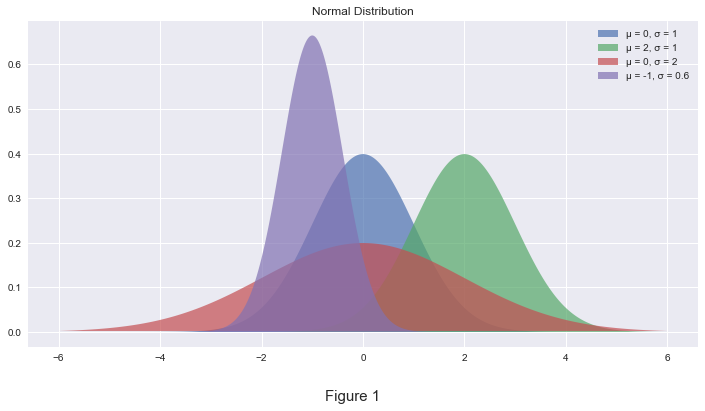

In [2]:
# generate array from -6 to 6 with 1000 increments
x = np.linspace(-6, 6, 1000)

def plot_normal_distribution(mean, std_dev, color, label_text):   
    '''This function uses probability density function to plot custom normal distributions'''
    ax.fill(x, norm.pdf(x, mean, std_dev), label = label_text, alpha = 0.7)
    return

Fig, ax = plt.subplots(figsize = (12, 6))
plt.figtext(0.5, 0.0, 'Figure 1', wrap = True, horizontalalignment = 'center', fontsize = 15)
ax.set_title('Normal Distribution')

# function calls for different mean and std dev values
plot_normal_distribution(mean = 0, std_dev = 1, color = 'b', label_text = 'μ = 0, σ = 1')
plot_normal_distribution(mean = 2, std_dev = 1, color = 'g', label_text = 'μ = 2, σ = 1')
plot_normal_distribution(mean = 0, std_dev = 2, color = 'r', label_text = 'μ = 0, σ = 2')
plot_normal_distribution(mean = -1, std_dev = 0.6, color = 'y', label_text = 'μ = -1, σ = 0.6')
plt.legend()
plt.show()

### Bias
This distribution occurs in many real world phenomena such as age, height, test-scores, IQ scores, men's height etc. Sharama (2019) helps explain this by describing how<br>
larger data sets with finite variances and independent feature probabilities will have a data distribution that favours the bell curve shape. Charan (2020) then details<br>
how a popluations with mean μ and standard deviation σ will tend towards a normal distribution with a sufficient sample size, i.e the Central Limit Theorem. <br>

### Importance 
The normal distribution is considered one of the most important of the probability distributions in statistics. Malif (2019) explores how its simple symmetric shape<br>
makes it easy to estimate the probability of certain events occuring via the normal probability density function, whereby the area under the curve represents the full<br>
probability range and equals to one. Many machine learning models including LDA, Guassian Naive Bayes, Logistic Regression and Linear Regression benifit from normalised<br>
data and are calculated assuming that the distribution is bivariate / multivariate normal [Barai 2020]. When dealing with such models cases arise where the target variables<br>
are not normally distributed and have to be transformed using methods such as linear , Boxcox or eo-Johnson Transformations [Malif (2019)]. 


<br>

## Variable Distributions:
***

A probability distribution is a function that describes all of the possible outcomes of a random variable along with their corresponding probability values<br>
(Brooks-Bartless 2018). Choosing the correct distribution to fit ones data shape and data type is very important as this help to describe the dataset and will<br>
have an impact on how your data behaves in a machine learning model. The distribution of the numeric variables declared in Table 1 will now be explored.



#### 1. Systolic and  2. Diastolic Blood Pressure
Pater (2005) details how both systolic and diastolic blood pressure belong to simplified, theoeretical normal distribution. He then details the underlying<br>
distirbutions for both systolic and diastolic blood pressure as two overlaping bell curve shaped distributions, one for the people without hypertension and<br>
one for those with hypertension (see [here](https://trialsjournal.biomedcentral.com/articles/10.1186/1468-6708-6-5/figures/4)). He deduces that this combination tends to overlap and result in a somewhat normal distribution shape when the <br>population sampled from contains a mix of each health status. The overlap is less prominent in systolic blood pressure which results in a slightly right skewed<br>
distribution caused by a correlation between increasing age with increasing systolic blood pressure. 


#### 3. BMI Body 
Penman et al.(2015) details a study caried out by Penman detailing the changing distribution of BMI in Mississippi's adults. The study ranged from 1990 to<br>
2003 with sample sizes varying from l,578 to a 4,422 samples per annum. He argued that, despite popular view, it had not been clearly proven that BMI follows<br>
the normal distribution. The study results yielded more of a log normal or right skewed distirbution, with the skew increasing overtime. The histogram of the 2003<br>
data shows a mean of 27.7 kg/m² and standard deviation of 6.1 (see [here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1636707/), Figure 2).

#### 4. Fat Percentage
With regards to body fat percentage, a very interesting study took place in China with 5763 participants with an average age of 52 years[Zou (2015)]. Importantly<br>
they study had nearly a 50:50 split between overweight and underweight samples. The study showed a normal distribution for both males and females across the<br>
underweight, overweight and obese categories (see distributions [here](https://bmcpublichealth.biomedcentral.com/articles/10.1186/s12889-020-08832-0/figures/1)). The mean total body fat % (all categories lumped into one) was shown to be 25% and 35% <br>for men and woman respectively. 


#### 5. Age
The central statistics office in Ireland carried out an age profile in a 2016 Cencus. They showed the age distirbution of males and females accross the country<br>
(see [here](https://www.cso.ie/en/releasesandpublications/ep/p-cp3oy/cp3/assr/), Figure 1.4). On analysis of the population pyramid it becomes clear that age distribution fluctuates accross the age range, but appears somewhat symmetric<br>between male and females for the given year. Sampling on a large very scale from such a distribution could yield a variety of outcomes. However if one sampled from a<br>
known age range it would be easier to predict the eventual distribution. Interestingly at the 35 year mark one can see somewhat of a bell curve shape appearing in the<br>
discrete data. Any smaller scale samples obviously would be much harder to predict based on population pyramid and would depend more on the population pyramid<br>
relevant to geographic sampling location.


<br>


#### Boledovičová et al.(2013)
Research up to this point has been taken from different sources. For allignment and modelling purposes the numerical hypertension variables from Table 1 will now<br>
be explored from a single study. Boledovičová et al.(2013) carried out a study on 120 men and 276 woman in Slovakia, where systolic and diastolic blood pressure<br>
readings were compared against age, BMI, weight and fat percentage. The study performed provided mean and standard deviation data on all variables (see table 3 below) and<br>
performed Pearson’s correlation analysis between the variables (discussed more later). Importantly the study mentioned that normality was confirmed accross all variables,<br>
which mostly alligns with previous findings in distribution research above. Any exceptions will now be further explored
<br>

- *Age:*<br>
Although the study reported that age was correctly described via a normal distirbution, it is more likely that the data was collected as discrete integer data and when<br>
plotted resembled the guassian bell curve shape. This assumption will be used moving forward when modelling the data.

- *Systolic Blood Pressure:*<br>
The reporting of normality for systolic blood prssure data by Boledovičová et al.(2013) will now be compared to reports from Pater (2005) research that systolic blood<br>
has a slight right leaning skew. To model the comparison a skewed distirbution (Fig1, subplot1) was plotted with a skew of 0.2 (skew reference in code) vs a normal<br>
distirbution (Fig1, subplot2). The difference in normality between the distributions does not appear significant at this value. Dan 2020 re-affirms this as he detailed<br>
how a skew value between -0.5 and 0.5 is considered symmetrical. An additional model (subplot3) was ran, whereby the code used to generate subplot2 skewed<br>
distribution was ran 10000 times and the skew range plotted. As shown the skew distribution ranges from cira -0.2 to 0.6, with a 0.66 % change of the value being<br>
larger than 0.5 (see subplot 3 title). Moving forward nromality will be assumed when modelling systolic blood pressure.




<br>
<table style = 'float : left;'>
    <caption>Table 3 [X]: Distribution Statistics</caption>
     <thead>      
      <tr>
        <th></th>
        <th>Male</th>
        <th>Male</th>
        <th>Female</th>
        <th>Female</th>  
      </tr>
    </thead>    
    <thead>      
      <tr>
        <th>Variable</th>
        <th>Mean</th>
        <th>Std Dev</th>
        <th>Mean</th>
        <th>Std Dev</th>  
      </tr>
    </thead>
    <tbody>
      <tr>
        <td>BPs [mmHg]</td>
        <td>133.1</td>
        <td>17.0</td>
        <td>127.7</td>
        <td>17.5</td>
      </tr>
   
      <tr>
        <td>BPd [mmHg]</td>
        <td>82.5</td>
        <td>11.6</td>
        <td>78.5</td>
        <td>10.6</td>
      </tr>
      <tr>
        <td>Body Fat %</td>
        <td>23.3</td>
        <td>7.0</td>
        <td>29.4</td>
        <td>8.3</td>
      </tr>
      <tr>
        <td>BMI [kg/m²]</td>
        <td>26.8</td>
        <td>3.9</td>
        <td>24.8</td>
        <td>4.6</td>
      </tr>
      <tr>
        <td>Age</td>
        <td>46.1</td>
        <td>16.6</td>
        <td>45.4</td>
        <td>15.4</td>
      </tr>
    </tbody>
 </table>

<br>



<br>

#### Systolic BP Distribution Code


In [3]:
# skew value for systolic blood pressure taken from table 2: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4746070/ 
# ref showns it to be 0.2 +/- 0.3 in standing position and controlled breathing samples
# this range matches fig1, subplots 3 distribution

#systolic blood press vars
BPs_σ_male = 133.1           # BPs std dev male
BPs_μ_male = 17.0            # BPs mean male
sample_size = 397            # from study popuuation
runs = 10000                 # number of runs skew will be calculated using 397 sample size
skew_α = 1.15                # skew parameter for rvs function

In [4]:
skew_n_low = skewnorm.rvs(skew_α, loc = BPs_σ_male, scale = BPs_μ_male, size = sample_size)             # draw samples from skewed distribution
normal_n_low = rng.normal(BPs_σ_male, BPs_μ_male, size = sample_size)                                   # draw samples from normal distribution
df_low_sample = pd.DataFrame({'right skewed (n= 397)' : skew_n_low,'normal (n= 397)' : normal_n_low})   # convert arrays to df cols

In [5]:
# systolic blood pressure variables for testing (male)
skew_α_male = np.repeat(skew_α, runs)
BPs_σ_male = np.repeat(BPs_σ_male, runs)
BPs_μ_male = np.repeat(BPs_μ_male, runs)

# generate 1000 skewed arrays using BP variables previously declared  
skewed_array = skewnorm.rvs(skew_α, loc = BPs_σ_male, scale = BPs_μ_male, size = (sample_size, runs))

# loop run range and append to list for histogram
skew_list = []
for i in range(runs):
    skew_list.append(pd.Series(skewed_array[:, i]).skew())
    
# convert skew_list to df for histplot
skew_col = pd.DataFrame(skew_list, columns = ['skew'])

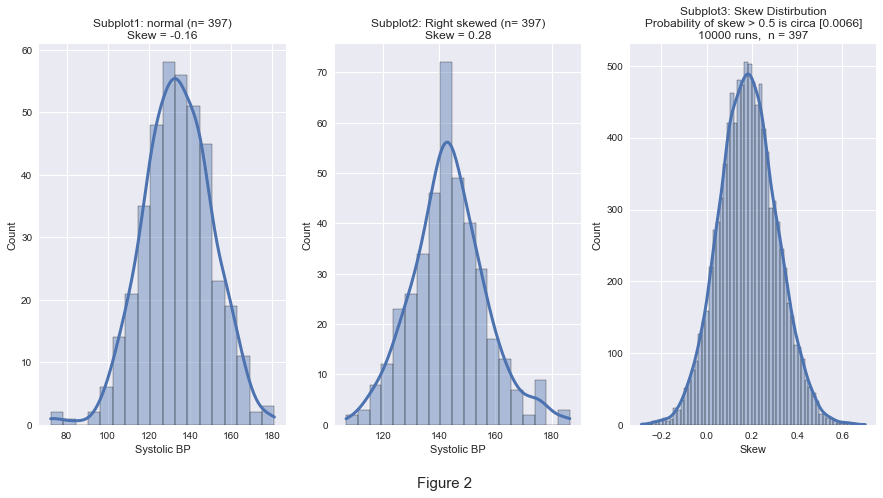

In [6]:
# define std dev and mean of array
skew_array = np.array(skew_col)
skew_array_μ = np.mean(skew_array)
skew_array_σ = np.std(skew_array) 
skew_array_max = np.max(skew_col)

# calculate probability that skew value will be greater than 0.5
cdf_probability = scipy.stats.norm.cdf(skew_array_max, loc = skew_array_μ, scale = skew_array_σ)- scipy.stats.norm.cdf(0.5, loc = skew_array_μ, scale = skew_array_σ)
cdf_probability = np.round(cdf_probability, decimals = 4)


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 7), sharex = False, sharey = False)
plt.figtext(0.5, 0.0, 'Figure 2', wrap = True, horizontalalignment = 'center', fontsize = 15)  

sns.histplot(ax = ax1, data = skew_col, x = df_low_sample['normal (n= 397)'], kde = True, alpha = 0.4, line_kws = {'linewidth': 3} )
sns.histplot(ax = ax2, data = skew_col, x = df_low_sample['right skewed (n= 397)'], kde = True, alpha = 0.4, line_kws = {'linewidth': 3} )
sns.histplot(ax = ax3, data = skew_col, x = skew_col['skew'], kde = True, alpha = 0.4, line_kws = {'linewidth': 3} );

# plot formatting
ax1.set_xlabel('Systolic BP')
ax2.set_xlabel('Systolic BP')
ax3.set_xlabel('Skew')
# add title, get skew value of df cols and round to 2 dec for first two subplots
ax1.set_title('Subplot1: normal (n= 397)\nSkew = {}'.format(round(df_low_sample['normal (n= 397)'].skew(), 2)))
ax2.set_title('Subplot2: Right skewed (n= 397)\nSkew = {}'.format(round(df_low_sample['right skewed (n= 397)'].skew(), 2)))
ax3.set_title('Subplot3: Skew Distirbution\nProbability of skew > 0.5 is circa {}\n10000 runs,  n = 397'.format(cdf_probability)) ;

## Variable Relationships:
***

### Correlation
Correlation is a measure of how two variables relate to one another. Singh (2019) helps describe the different types of correlation:
- **Positive correlation:** when two variables increase / decrease in parallel, i.e if one increases the other follow suit.
- **Negative correlation:** when two variables increase / decrease inversely, i.e if one increases the other decreases.
- **No correlation:** when the direction of a variable doesn't effect another variable.<br>
<br>


### Pearson Correlation
Pearsons Correlation quantifies the linear relationship between variables, i.e draws a line of best fit through each variable pair. This method yields an 'r' value<br>
called  Pearson’s correlation coefficient. Kuzmic (2021) describes how r is a measure of the strength of the relationship between the two variables and the direction.<br>
The strength is described by a number (between -1 to 1) and direction by the sign (+ / -). See Figure 2 below for modelled correlations with the coressponding Pearsons<br>Correlation matrix present as a title on each subplot.

C:\Users\Ciaran\anaconda3\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


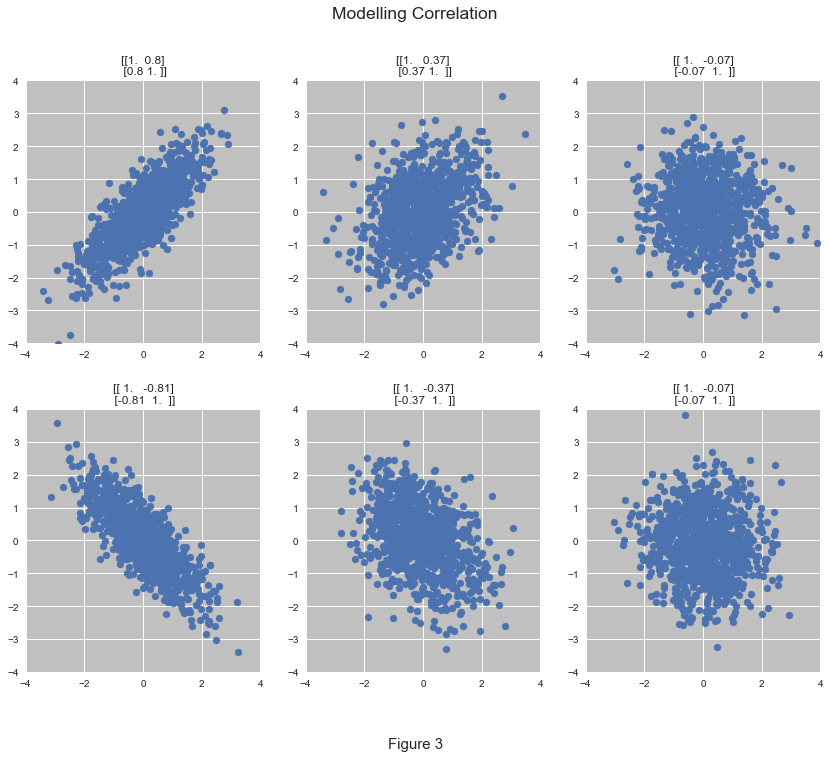

In [7]:
# Real World Analysis Code
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

fig, ax = plt.subplots(2, 3, figsize = (12, 10))
plt.figtext(0.5, -0.05, 'Figure 3',wrap = True, horizontalalignment = 'center', fontsize = 15)
fig.suptitle('Modelling Correlation',fontsize = 17.5)
plt.subplots_adjust(wspace = 0.25, hspace = 0.25, top = 0.95)  


def plot_multi_scatter(subplot_index, arrays):
    '''This function plots a scatter plot matrix in a loop using subplots indexes and df col ref parameters'''
    
    # calc correlation matrix of 2 arrays and round to 2 decimals (will be used as subplot title)
    corr_matrix = np.round(np.corrcoef(arrays[:,0],arrays[:,1]), decimals = 2)
      
    # plot formatting: uses passed_subplots index to refer to correct ax        
    ax[subplot_index].set_title(corr_matrix)
    ax[subplot_index].set_xlim([-4, 4])
    ax[subplot_index].set_ylim([-4, 4])
    ax[subplot_index].set_facecolor('silver')  
    ax[subplot_index].scatter(arrays[:,0], arrays[:,1])
    return
    
    
mean = (0, 0)
num_samples = 1000
corr1 = rng.multivariate_normal(mean, [[1, 0.8], [0.8, 1]], num_samples)  
corr2 = rng.multivariate_normal(mean, [[1, 0.4], [0.4, 1]], num_samples)  
corr3 = rng.multivariate_normal(mean, [[1, 0.0], [0.0, 1]], num_samples)  
corr4 = rng.multivariate_normal(mean, [[1, -0.8], [-0.8, 1]], num_samples)  
corr5 = rng.multivariate_normal(mean, [[1, -0.4], [-0.4, 1]], num_samples)  
corr6 = rng.multivariate_normal(mean, [[1, -0.0], [-0.0, 1]], num_samples) 

subplot_list = [corr1, corr2, corr3, corr4, corr5, corr6]

# generate 2d (2 x 3) array  
arr = np.arange(18).reshape(2, 3, 3)

# iterate over 2d array and return tuple of indices and a count on the index
for count, idx in enumerate(np.ndindex(arr.shape[:2])):
    plot_multi_scatter(idx, subplot_list[count])   

fig.tight_layout(pad = 2);

#### Boledovičová et al.(2013)

Before using Pearons Correlation to describe variable pairs one should check that the pairs are normally distirbuted, continuous (interval / ratio measurement scale),<br>
dont have major outliers, have a linear relationship and that the observations are in pairs, i.e each variable has a corresponding observation.[Magiya (2019)]. If variable<br>
pairs deviate from these assumptions one should consider using a non-parametric alternatives to analyze the strength of association between their variables, for example<br>
Spearmans Correlation.

Pre-modelling the relationships between the hypersensitive variables, the Pearson rules for accuracy will now be explored. All numeric variables (age, BPs, BPd,<br>
body fat %, BMI) will be considered normally distributed as per Boledovičová, M et al. (2013) study. Age will be rounded to its discrete counter-part post correlation.<br>
All numeric variables are ratio variables as they have a true zero value. For modelling purposes the presence of outliers will be assumed to be insignificant. Lastly, the<br>
relationship between the dependant variables (BPs and BPd) with the independant variables (age, BMI and body fat percentage) will be taken as linear based on the<br>
following findings:
- **BPs vs BPD:**<br>
Systolic and Diastolic blood pressure measurements frequently show a highly linear relationship [Gavish, B, 2021].<br>

- **Blood Pressure vs Age:**<br>
In a cross-sectional study with circa 3.3 million people aged 35–75 years were analysed from September 2014 through August 2019. The study that found systolic<br>
blood was linear and positively associated with age, whearas diastolic blood pressure showed a linear increase with age from the age of 35 to 54 years which shifts<br>
to a slight linear descrease from 55 to 75 years [Xi Li et al., 2020,]. This slight deviation from linearity suggests that Spearman's may have been a more appropriate<br>
method of correlation between with systolic blood pressure, however Pearsons Correlation will be used to simulate the data reported by Boledovičová et al.(2013),<br>
i.e Table 3 below.

- **Blood Pressure vs BMI:**<br>
Kalantari et al. (2017) performed a study on 1579 subjects aged 10 to 19 years and found that linear association existed between BMI and both systolic and<br>
diastolic blood pressure.

- **Blood Pressure vs Body Fat Percentage**:<br>
A study on Association between Body Fat and Elevated Blood Pressure among Children and Adolescents Aged 7–17 Years provides evidence on the multivariable<br>
association and somewhat linear relationship between systolic / diastolic blood pressure and body fat percentage [(See Figure 1)](https://www.mdpi.com/1660-4601/18/17/9254/htm)[Chen, M et al., 2021].

##### P-Values
Table 4 below declares the reported variable correlations. The study reported all p-values of <0.05 for the female correlations, however some of the male p-values<br>
were reported >0.05 (i.e: Age vs BPS at 0.07, age vs BPd at 0.06, age vs BMI at 0.48 and age vs weight at 0.31). One can think of p-values as a statistical measure<br>
to evaluate the significance of the empirical analysis. In relation to calculating the Pearson Correlation between 2 variables, one would put forward a null hypothesis<br>
that the variables are not correlated. A p-value of < 0.05 is typically considered significant, where one would reject the null hypothesis, i.e in this case reject the<br>
notion that the correlation is not significant more likely reflects a true value. For example a p-value of 0.06 between age vs BPd indicates that there is a 6% chance<br>
that the correlation would have been observed if there was really no correlation between the variables. The occurance of reported p-values ≥ 0.05 in the male population<br>
is most likely due to the low sample size.


<br>

<table style = 'float : left;'>
    <caption>Table 4 [X]: Correlation Table</caption>
     <thead>      
    </thead>    
    <thead>      
        
        
      <tr>
        <th></th>
        <td></td>
        <th>Age</th>  
        <th>BPs</th>
        <th>BPd</th>
        <th>Fat %</th>
        <th>BMI</th>  
      </tr>
    </thead>
    <tbody>
      <tr>
        <td>Male</td>
        <td>Age</td>
        <td>1.00</td>
        <td>0.16</td>
        <td>0.16</td>
        <td>0.38</td>
        <td>0.64</td>
      </tr>
   
      <tr>
        <td>Male</td>
        <td>BPs [mmHg]</td>
        <td>0.16</td>
        <td>1.00</td>
        <td>0.70</td>
        <td>0.38</td>
        <td>0.37</td>
      </tr>
      <tr>
        <td>Male</td>  
        <td>BPd [mmHg]</td>
        <td>0.16</td>
        <td>0.70</td>
        <td>1.00</td>
        <td>0.22</td>
        <td>0.23</td>
      </tr>
      <tr>
        <td>Male</td>
        <td>Body Fat %</td>
        <td>0.38</td>
        <td>0.38</td>
        <td>0.22</td>
        <td>1.00</td>
        <td>0.69</td>
      </tr>
      <tr>
        <td>Male</td>
        <td>BMI [kg/m²]</td>
        <td>0.64</td>
        <td>0.37</td>
        <td>0.23</td>
        <td>0.69</td>
        <td>1.00</td>
      </tr>
        
       <tr>
        <th></th>
            <th></th>
        <th>Age</th>  
        <th>BPs</th>
        <th>BPd</th>
        <th>Fat %</th>
        <th>BMI</th>  
      </tr>
    </thead>
    <tbody>
      <tr>
        <td>Female</td>
        <td>Age</td>
        <td>1.00</td>
        <td>0.46</td>
        <td>0.33</td>
        <td>0.63</td>
        <td>0.44</td>
      </tr>
   
      <tr>
        <td>Female</td>
        <td>BPs [mmHg]</td>
        <td>0.46</td>
        <td>1.00</td>
        <td>0.70</td>
        <td>0.39</td>
        <td>0.37</td>
      </tr>
      <tr>
        <td>Female</td>  
        <td>BPd [mmHg]</td>
        <td>0.33</td>
        <td>0.70</td>
        <td>1.00</td>
        <td>0.32</td>
        <td>0.35</td>
      </tr>
      <tr>
        <td>Female</td>
        <td>Body Fat %</td>
        <td>0.63</td>
        <td>0.39</td>
        <td>0.32</td>
        <td>1.00</td>
        <td>0.81</td>
      </tr>
      <tr>
        <td>Female</td>
        <td>BMI [kg/m²]</td>
        <td>0.44</td>
        <td>0.37</td>
        <td>0.35</td>
        <td>0.81</td>
        <td>1.00</td>
      </tr>     
        
    </tbody>
 </table>


<br>

## Simulating The Dataset
***

Although the majority of the p-values reported from table 3 are less than 0.05, this statistical significance does not imply the correlations imply causation. However for<br>
modelling purposes and given the research done to this point, it was deemed appropriate to model the variables as a multivariate normal distribution, i.e: modelling of a<br>
univeriate normal distirubtion raised to higher dimensions. <br><br>
As per the [official documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.multivariate_normal.html#numpy.random.Generator.multivariate_normal) NumPy offers a function to generate multiple normally distribted arrays correlated by a given covariance matrix. This function is extremely<br>
useful for modelling as one can dictate the mean, standard deviation and correlation of multiple arrays at once. To leverage this *multivariate_normal()* function the correlation<br>
matrices (Table 3) will need to be converted to covariance matrices. The conversion can be achieved by manupulation of formula below, where covariance will equal to the<br>product of the standard deviation (σ) of the variable pairs multiply by the correlation (P).


<h2>$P(x, y)=\frac{{cov}{(x, y)}}{σxσy}$ <h2>


In [8]:
import matplotlib.pyplot as plt             # for plotting
import seaborn as sns                       # for plotting
import numpy as np                          # for numeric processing (from different distributions)
import pandas as pd                         # to generate dataframes & manipulat data

plt.rcParams['font.size'] = 15              # set default plot font size 
plt.rcParams["figure.figsize"] = (10, 6)    # set default figure font size 
plt.style.use('seaborn')                    # set default stype for plotting

In [9]:
def var_matrix_generator(σ_age, σ_bps, σ_bpd, σ_fat, σ_bmi):  
    '''Returns a variance matrix from the passed σ values, 
    with the diagnal as the square of the variable std_dev'''
                     # Age                BPs                 BPd              # Fat %            # BMI
    σ_matrix = [[σ_age**2,           σ_bps * σ_age,     σ_bpd * σ_age,     σ_fat * σ_age,    σ_bmi * σ_age],    # age
                [σ_age * σ_bps,      σ_bps**2,          σ_bpd * σ_bps,     σ_fat * σ_bps,    σ_bmi * σ_bps],    # BPs
                [σ_age * σ_bpd,      σ_bps * σ_bpd,     σ_bpd**2,          σ_fat * σ_bpd,    σ_bmi *  σ_bpd],   # BPd 
                [σ_age * σ_fat,      σ_bps * σ_fat,     σ_bpd * σ_fat,     σ_fat**2,         σ_bmi *  σ_fat],   # Fat %        
                [σ_age * σ_bmi,      σ_bps * σ_bmi,     σ_bpd * σ_bmi,     σ_fat * σ_bmi,    σ_bmi**2]]         # BMI 
    
    return np.array(σ_matrix)


def correlation_to_covariance(corr_matrix, var_matrix): 
    '''Returns covariance matrix array, via multiplying correlation matrix by variance matrix'''
    cov_matrix = corr_matrix * var_matrix
    return np.array(cov_matrix)

In [10]:
# declare correlation matrix x2 from table 3

                        # Age     BPs     BPd    Fat %    BMI
corr_matrix_female =   [[1.00,   0.46,   0.33,   0.63,   0.44   ],    # age
                       [0.46,    1.00,   0.70,   0.39,   0.37   ],    # BPs
                       [0.33,    0.70,   1.00,   0.32,   0.35   ],    # BPd 
                       [0.63,    0.39,   0.32,   1.00,   0.81   ],    # Fat %        
                       [0.44,    0.37,   0.35,   0.81,   1.00   ]]    # BMI

                        # Age     BPs     BPd    Fat %    BMI
corr_matrix_male =     [[1.00,   0.16,   0.16,   0.38,   0.64   ],    # age
                       [0.16,    1.00,   0.70,   0.38,   0.37   ],    # BPs
                       [0.16,    0.70,   1.00,   0.22,   0.23   ],    # BPd 
                       [0.38,    0.38,   0.22,   1.00,   0.69   ],    # Fat %        
                       [0.64,    0.37,   0.23,   0.69,   1.00   ]]    # BMI


In [11]:
# declare standard dev tuples for both female and male
# index order: Age. BPs, BPd, Fat%, BMI
σ_female = var_matrix_generator(15.4, 17.5, 10.6, 8.3, 4.6)
σ_male = var_matrix_generator(16.6, 17.0, 11.6, 7.0, 3.9)

# convert correlation matrix to covariance matrix 
cov_matrix_female = correlation_to_covariance(corr_matrix_female, σ_female)
cov_matrix_male = correlation_to_covariance(corr_matrix_male, σ_male)

# declare mean values in tuple, wil use to geenerate multivariate samples
# index order: Age. BPs, BPd, Fat%, BMI
μ_values_female = (45.4, 127.7, 78.5, 29.4, 24.8)
μ_values_male = (46.1, 133.1, 82.5, 23.3, 26.8)

# sample numbers from study: Boledovičová et al.(2013)
male_sample_num = 120
female_sample_num = 276

In [12]:
def simulate_dataset():
    # generate x5 multiviariate arrays 
    female_multi_array = np.random.multivariate_normal(μ_values_female, cov_matrix_female, (female_sample_num)) 
    male_multi_array = np.random.multivariate_normal(μ_values_male, cov_matrix_male, (male_sample_num)) 

    # generate dataframes, indexing relevant arrays for relevant columns
    df_female = pd.DataFrame({'age': female_multi_array[:, 0], 'bps': female_multi_array[:, 1], 'bpd': female_multi_array[:, 2], 
                              'fat%': female_multi_array[:, 3], 'BMI': female_multi_array[:, 4]})   

    df_male = pd.DataFrame({'age': male_multi_array[:, 0], 'bps': male_multi_array[:, 1], 'bpd': male_multi_array[:, 2], 
                              'fat%': male_multi_array[:, 3], 'BMI': male_multi_array[:, 4]})
    # add gender cols
    df_male.insert(0, 'gender', 'male')
    df_female.insert(0, 'gender', 'female')
    
    #combine both gender dfs
    df_merge = pd.concat([df_male, df_female], ignore_index = True)

    # round age to nearest int value
    df_merge['age'] = df_merge['age'].round(0).astype(int)

    # round continuous variable cols to 1 decimal
    continuous_cols = ['bps', 'bpd', 'fat%', 'BMI']
    df_merge[continuous_cols] = df_merge[continuous_cols].round(1)
  

    # store systolic / diastolic bp cols in variables and round to nearest dec
    bps = np.around(df_merge['bps'], 0)
    bpd = np.around(df_merge['bpd'], 0)
    
    # Set conditions for determining blood pressure categories (data based on Table 1 values)
    criteria = [
        (bps >= 140) | (bpd >= 90),
        ((bps >= 130)  & (bps <= 139)) | ((bpd >= 80) & (bpd <= 89)),
        ((bps >= 120)  & (bps <= 129)) &  (bpd < 80),
        (bps < 120) & (bpd < 80)
    ]

    # results for listed criteria above
    result = ['HP 2', 'HP 1', 'Elevated', 'Normal']
    
    # return result based on successful criteria (by index)
    df_merge['BP category'] = np.select(criteria, result)
    df_merge.head(5)
    return df_merge, df_male, df_female

In [13]:
# store dfs in list
df_tuple = simulate_dataset()

# seperate out variables for later use
# this was done to enable function call to simulate dataset at end of notebook
df_female = df_tuple[2]
df_male = df_tuple[1]
df = df_tuple[0]

In [14]:
# Check that generated correlation conversion worked for Female data
print(' '*10 + 'Generated Female Corr\n', +round(df_female.corr(), 2))
print('\n' + ' '*10 + 'Reference Female Corr')
for sublist in corr_matrix_female:
    print('     ',sublist)

          Generated Female Corr
        age   bps   bpd  fat%   BMI
age   1.00  0.51  0.34  0.64  0.46
bps   0.51  1.00  0.65  0.45  0.43
bpd   0.34  0.65  1.00  0.34  0.40
fat%  0.64  0.45  0.34  1.00  0.83
BMI   0.46  0.43  0.40  0.83  1.00

          Reference Female Corr
      [1.0, 0.46, 0.33, 0.63, 0.44]
      [0.46, 1.0, 0.7, 0.39, 0.37]
      [0.33, 0.7, 1.0, 0.32, 0.35]
      [0.63, 0.39, 0.32, 1.0, 0.81]
      [0.44, 0.37, 0.35, 0.81, 1.0]


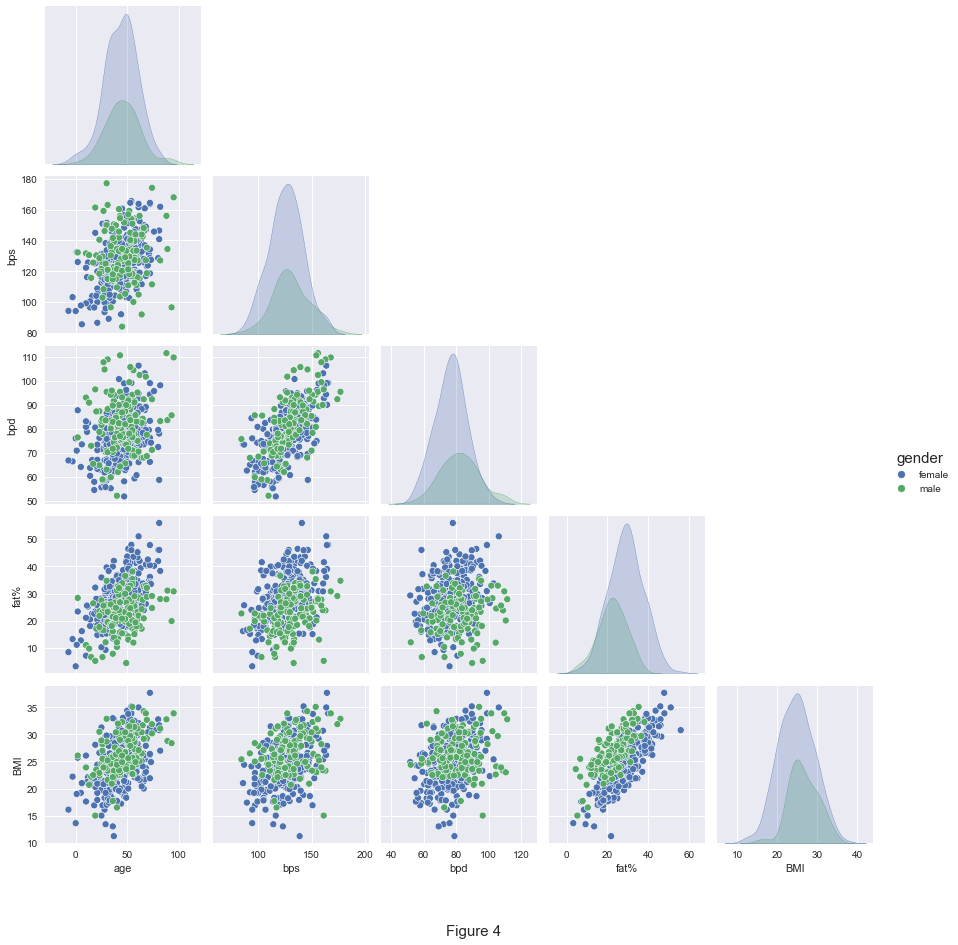

In [15]:
# visualisation of distribution / correlations
# You can see the std dev, mean and correlations inputted to the numpy multivariate normal function
# correctly reflected in the pairplot below, e.g systolic vs diastolic bp has highest cross variable positive correlation

# sort df to bring male data to front of plot (as less values present)
df.sort_values(by = 'gender', ascending = True, inplace = True)
sns.pairplot(df, hue = 'gender', corner = True);
plt.figtext(0.5, -0.05, 'Figure 4',wrap = True, horizontalalignment = 'center', fontsize = 15);


<br>


## Comparison to Source Data
***
### Multiple linear regression Model


In [17]:
# Aim: Compute intercept and 2x coefficients (i.e slopes of lines relating to age and bodyfat%)
# Then compare results to that of Boledovičová et al.(2013)

In [18]:
# importing modules needed to split dataset for training and apply linear Regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# code adopted from https://stackabuse.com/linear-regression-in-python-with-scikit-learn/
def compute_linear_regression_stats(independant_vars, dependant_var):
    '''This function returns the co-effecients array  and intercept of linear regression model'''
    
    X = independant_vars
    y = dependant_var
    
    # splitting the data for training purposes, set training set to 20 % of the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)

    regressor = LinearRegression()   # instansiate an object of LinearRegression class
    regressor.fit(X_train, y_train)  # fitting the training data
    return np.round(regressor.coef_, 3), np.round(regressor.intercept_, 3)

In [21]:
def simulate_regression_eqn(df, intercept, coeff_fat, coeff_age):
    '''computes and returns list of y co-ordinates using passed data, intercept and co-efficients'''
    bp_results = []          # declare list for storing y co-ordinates
    
    # iterates age & fat percentage as tuple
    for age, fat_percent in zip(df['age'], df['fat%']): 
        # calculate y using multiple linear regression eqn
        bp_result = intercept + (coeff_fat * (fat_percent / 100)) + (coeff_age * age)
        bp_results.append(bp_result)
    return bp_results


In [23]:

# return co-efficents and intercept of linear regression models in relevant variables
reg_female_bps = compute_linear_regression_stats(df_female[['age', 'fat%']], df_female['bps'])
reg_female_bpd = compute_linear_regression_stats(df_female[['age', 'fat%']], df_female['bpd'])

# Test Model: store models regression stats
# female stats
female_bps_coeff_age = reg_female_bps[0][0]
female_bps_coeff_fat = reg_female_bps[0][1]
female_bps_intercept = reg_female_bps[1]
female_bpd_coeff_age = reg_female_bpd[0][0]
female_bpd_coeff_fat = reg_female_bpd[0][1]
female_bpd_intercept = reg_female_bpd[1]

# Return data for male and female systolic blood pressure
actual_model_female_bps = simulate_regression_eqn(df_female, female_bps_intercept, female_bps_coeff_fat, female_bps_coeff_age)
actual_model_female_bpd = simulate_regression_eqn(df_female, female_bpd_intercept, female_bpd_coeff_fat, female_bpd_coeff_age)

# Reference Female Model from Boledovičová et al.(2013): 
# return data for male and female systolic blood pressure
    # Blood pressure systolic = 100.13 + 0.332 × fat percentage + 0.365 × age     
    # Blood pressure diastolic = 65.56 + 0.214 × fat percentage + 0.141 × age
ref_model_female_bps = simulate_regression_eqn(df_female, 100.13, 0.332, 0.365)
ref_model_female_bpd = simulate_regression_eqn(df_female, 65.56, 0.214, 0.141)

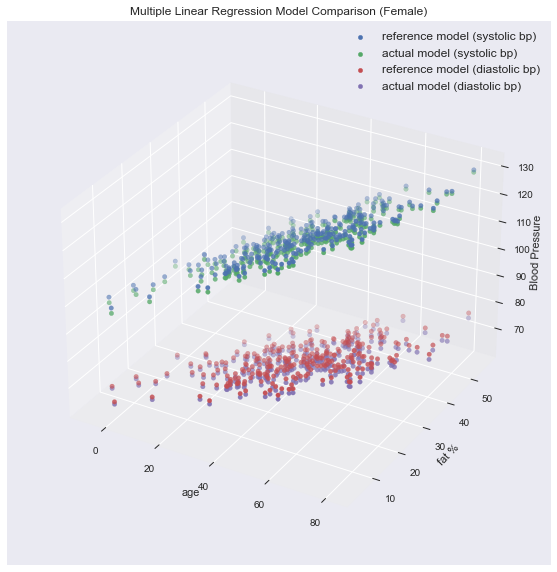

In [24]:

fig = plt.figure(figsize = (10, 10))    # add figure
ax = plt.axes(projection='3d')          # set axis to 3 dimensional

# scatter plot code
ax.scatter(df_female['age'], df_female['fat%'], ref_model_female_bps, label = 'reference model (systolic bp)') 
ax.scatter(df_female['age'], df_female['fat%'], actual_model_female_bps, label = 'actual model (systolic bp)')
ax.scatter(df_female['age'], df_female['fat%'], ref_model_female_bpd, label = 'reference model (diastolic bp)') 
ax.scatter(df_female['age'], df_female['fat%'], actual_model_female_bpd, label = 'actual model (diastolic bp)')

# format plot code
plt.rcParams.update({'font.size': 22})
ax.set_title('Multiple Linear Regression Model Comparison (Female)')
ax.set_xlabel('age')
ax.set_ylabel('fat %')
ax.set_zlabel('Blood Pressure')
ax.dist = 11
plt.legend(prop={"size":12}) 
plt.show()

## References
***

[X] CDC, 2021, High Blood Pressure Symptoms and Causes, Available at:<br>
[Ref X](https://www.cdc.gov/bloodpressure/about.htm) (Accessed 08 December 2021).<br>

<br>

[X]. Singh, S, 2019, Getting the Basics of Correlation & Covariance, Available at:<br>
[Ref X](https://towardsdatascience.com/getting-the-basics-of-correlation-covariance-c8fc110b90b4) (Accessed 07 December 2021).


<br>

[X]. Justin, B, et al. (2013), Risk Models to Predict Hypertension: A Systematic Review, Plos One, Availabile at:<br>
[Ref X](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3702558/) (Accessed 08 December 2021).

<br>

[X]. Glen, S, 2021, What is a C-Statistic?, Statistics How To, Available at: <br>
[Ref X](https://www.statisticshowto.com/c-statistic/) (Accessed 09 December 2021).


<br>

[X].Papathanasiou, G et al. (2015), Association of High Blood Pressure with Body Mass Index, Smoking and Physical Activity in Healthy Young Adults,<br>
Available at: [Ref X](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4378027/) (Accessed 13 December 2021).


<br>

[X]. Boledovičová, M et al. (2013), Blood pressure relation to body composition and age: Analysis of a nurse-led investigation and consultation program,<br>
Available at: [Ref X](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3728227/) (Accessed 13 December 2021).


<br>


[X]. Brownlee, J, 2020, How to Choose a Feature Selection Method For Machine Learning, Available at:<br>
[Ref Link X](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/) (Accessed 13 December 2021).


<br>

[X]. Ren, Z et al (2020), A novel predicted model for hypertension based on a large cross-sectional study, Available at:<br>
[Ref Link X](https://www.nature.com/articles/s41598-020-64980-8) (Accessed 13 December 2021).


<br>

[X]. Zeng, Q at al. (2012), Percent body fat is a better predictor of cardiovascular risk factors than body mass index, Available at:<br>
[Ref Link X](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3854278/) (Accessed 13 December 2021)



<br>

[X]. Pater, C, 2005, The Blood Pressure "Uncertainty Range" – a pragmatic approach to overcome current diagnostic uncertainties (II), Avilabile at:<br>
[Ref Link X](https://trialsjournal.biomedcentral.com/articles/10.1186/1468-6708-6-5) (Accessed 14 December 2021).

<br>

[X]. Hossian, Z, 2020, Get Familiar with the Most Powerful Weapon of Data Science Variables, Available at:<br>
[Ref Link X:](https://towardsdatascience.com/get-familiar-with-the-most-important-weapon-of-data-science-variables-48cc7cd85dc5) (Accessed 13 December 2021).

<br>
Hossian (2020)


<br>

[X]. Brownlee, J, 2019, just a collection of parameterized probability distributions, Available at:<br>
[Ref Link X ](https://machinelearningmastery.com/continuous-probability-distributions-for-machine-learning/) (Accessed 14 December 2021).

<br>

[X]. Brooks-Bartlett, J, 2018, What is a probability distribution?, towards data science,
Available at: [Ref Link X](https://towardsdatascience.com/probability-concepts-explained-probability-distributions-introduction-part-3-4a5db81858dc), (Accessed 15 November 2021).


<br>


[X]. Penman, A et al. (2015), BThe Changing Shape of the Body Mass Index Distribution Curve in the Population: Implications for Public Health Policy to<br>
Reduce the Prevalence of Adult Obesity, Available at: [Ref X](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1636707/) (Accessed 15 December 2021).



<br>

[X]. Zou, Q et al. (2015), The association between physical activity and body fat percentage with adjustment for body mass index among middle-aged adults:<br>
China health and nutrition survey in 2015, BMC Public Health, Available at: [Ref X](https://bmcpublichealth.biomedcentral.com/articles/10.1186/s12889-020-08832-0) (Accessed 15 December 2021).

<br>


[X]. Yao, F et al. (2020), BMI modified the association of current smoking with the incidence of hypertension in Chinese population: a 22-year cohort study,<br>
BMC Public Health, Available at: [Ref Link X](https://bmcpublichealth.biomedcentral.com/articles/10.1186/s12889-020-8428-z) (Accessed 20 December 2021).

<br>


[X]. Sharma, R, 2019, Gaussian distribution, towards data science,<br>
Available at: [Ref link X](https://medium.com/ai-techsystems/gaussian-distribution-why-is-it-important-in-data-science-and-machine-learning-9adbe0e5f8ac), (Accessed 15 October 2021). <br>

<br>

[X]. Charan, R, 2020, towards data science, Why is the Normal Distribution so Normal? Available at:<br>
[Ref Link X](https://towardsdatascience.com/why-is-the-normal-distribution-so-normal-e644b0a50587) (Accessed 20 December 2021).

<br>

[X]. Malik, F, 2019, Ever Wondered Why Normal Distribution Is So Important?, towards data science, Available at:<br>
[Ref Link X](https://medium.com/fintechexplained/ever-wondered-why-normal-distribution-is-so-important-110a482abee3) (Accessed 20 December 2021).

<br>

[X]. Barai, A, 2020, Normal Distribution and Machine Learning, medium.com, Available at:<br>
[Ref Link X](https://medium.com/analytics-vidhya/normal-distribution-and-machine-learning-ec9d3ca05070) (Accessed 20 December 2021).

<br>


[X]. Dan, A, 2022, Kurtosis() & Skew() Function In Pandas, medium.com, Available at:<br>
[Ref Link X](https://medium.com/@atanudan/kurtosis-skew-function-in-pandas-aa63d72e20de.) (Accessedc 22 December 2021). 

<br>


[X] Kuzmic, N, 2021, towards data science, Available at:<br>
[Ref Link X](https://towardsdatascience.com/tagged/pearson-correlation) (Accessed 23 December 2021).


<br> 


[X]. Singh, V, 2019, Pearson Correlation, a Mathematical Understanding!, medium.com, Available at:<br>
[Ref Link X](https://medium.com/@SilentFlame/pearson-correlation-a-mathematical-understanding-c9aa686113cb) (Accessed 23 December 2021).


<br>

 
[X]. Magiya, J, 2019, Pearson Coefficient of Correlation Explained., towards data science, Available at:<br>
[Ref Link X](https://towardsdatascience.com/pearson-coefficient-of-correlation-explained-369991d93404) (Accessed 23 December 2021).


<br>


[X]. Gavish, B, 2021, , The relationship between systolic and diastolic pressures: a possible link between risk-related clinical measures and arterial properties,<br>
Hypertension Research, Available at:<br>
[Ref Link X](https://www.nature.com/articles/hr201097) (Accessed 27 December 2021). <br>

<br>

[X]. Xi Li et al., 2020, Association of age and blood pressure among 3.3 million adults: insights from China PEACE million persons project, Journal of Hypertension,<br>
Avaialble at: [Ref Link X]() (Accessed 27 December 2021).<br>

<br>

[X]. Kalantara S et al., 2017,  Predictors of early adulthood hypertension during adolescence: a population-based cohort study, BMC Public Health (2017) 17:915,<br>
DOI 10.1186/s12889-017-4922-3.

<br>

[X]. Chen, M et al., 2021, Association between Body Fat and Elevated Blood Pressure among Children and Adolescents Aged 7–17 Years: Using Dual-Energy X-ray Absorptiometry (DEXA)<br>
and Bioelectrical Impedance Analysis (BIA) from a Cross-Sectional Study in China, MDPI, Available at:<br> [Ref Link X](https://www.mdpi.com/1660-4601/18/17/9254/htm) (Accessed 27 December 2021).


# End
***